In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# import internal files
import emulator
import kernels
import data
import historymatch
import plot

In [14]:
def model_eqn_1(x, y, a):
    return np.cos(np.sqrt(x**2 + 2*y**2 + 3*a**2))
    #return a + y + x
    
model1 = np.vectorize(model_eqn_1)

In [15]:
def model_eqn_2(x, y, a):
    #return np.sin(np.sqrt(x**2 + 4*y**2 + 2*a**2))
    return a**2 - y + x

model2 = np.vectorize(model_eqn_2)

In [22]:
# define parameter space
x_bound = np.array([-2, 2]).reshape(1,-1)
y_bound = np.array([-2, 2]).reshape(1,-1)
a_bound = np.array([-2, 2]).reshape(1,-1)
input_bounds = np.concatenate((x_bound, y_bound, a_bound), axis=0)

xvals = np.linspace(input_bounds[0,0], input_bounds[0,1], 100)
yvals = np.linspace(input_bounds[1,0], input_bounds[1,1], 100)
avals = np.linspace(input_bounds[2,0], input_bounds[2,1], 100)

In [23]:
# for testing: true datapoints
true_x = -0.1
true_y = 1.2
true_a = 0.3

true_parameters_m1 = [-0.1, 1.2, 0.3]
true_parameters_m2 = [-0.1, 1.2, 0.3]

var_exp = 0.001        # observational uncertainty variance
z_1 = model_eqn_1(*true_parameters_m1) + np.random.normal(0,var_exp) # observed datapoint
z_2 = model_eqn_2(*true_parameters_m2) + np.random.normal(0,var_exp) # observed datapoint

In [24]:
# simulation parameters
Ntraining = 50          # number of training points
ndim = 3        # model dimensions
Nsamples = 10000    # number of test points

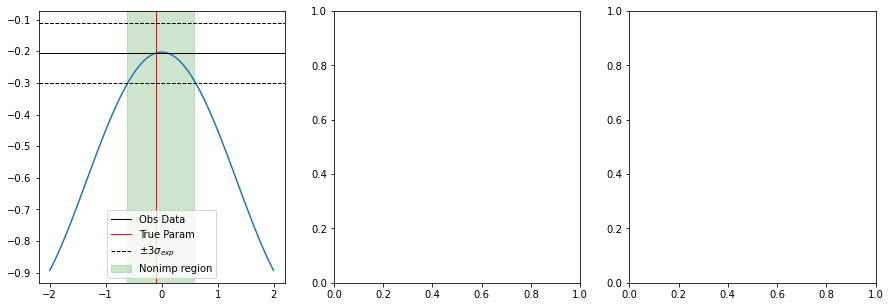

In [45]:
# visualise model 1

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
func = model1(xvals, true_parameters_m1[1], true_parameters_m1[2])
ax1.plot(xvals, model1(xvals, true_parameters_m1[1], true_parameters_m1[2]))
ax1.axhline(z_1, color='black', linewidth=1, label='Obs Data')
ax1.axvline(true_parameters_m1[0], color='red', linewidth=1, label='True Param')

ax1.axhline(z_1+3*np.sqrt(var_exp), color='black', linewidth=1, linestyle='--')
ax1.axhline(z_1-3*np.sqrt(var_exp), color='black', linewidth=1, linestyle='--', label = r'$\pm 3\sigma_{exp}$')

xidx1 = np.argwhere(np.diff(np.sign( func - z_1+3*np.sqrt(var_exp)))).flatten()  # upper
xidx2 = np.argwhere(np.diff(np.sign( func - z_1-3*np.sqrt(var_exp)))).flatten()  # lower

ax1.axvspan(xvals[xidx1][0], xvals[xidx1][1], color='green', alpha=0.2, label='Nonimp region')
ax1.legend(loc='best')

NameError: name 'model' is not defined

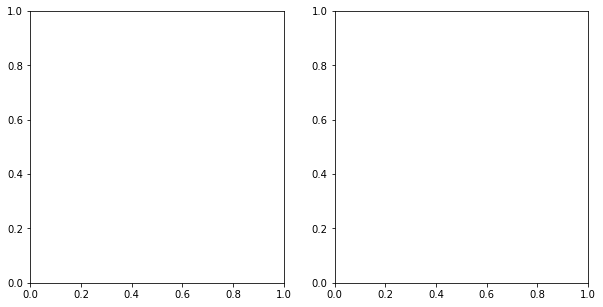

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

X, Y = np.meshgrid(xvals, yvals)
func_grid = model(X, Y)

ax1.scatter(X,Y, s=1)

idx = np.argwhere(np.logical_and(func_grid > z_1-1*np.sqrt(var_exp), func_grid < z_1+1*np.sqrt(var_exp)))

mean_idx = np.argwhere(np.diff(np.sign( func_grid - z_1)))

idxtest = np.argwhere(func_grid > z_1-3*np.sqrt(var_exp))

ax1.scatter(xvals[idx[:,1]], yvals[idx[:,0]], color='limegreen')
ax1.scatter(xvals[mean_idx[:,1]], yvals[mean_idx[:,0]], color='red', s = 1)

for i in range(len(idx)):
    xy_grid[idx[i,0], idx[i,1]] = 1
    
for i in range(len(mean_idx)):
    xy_grid[mean_idx[i,0], mean_idx[i,1]] = 2
    
ax1.scatter(true_x, true_y, color='red')

ax2.contourf(xvals, yvals, xy_grid, cmap='viridis')